In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!wget https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media&token=e1403951-30d6-42b8-ba4e-394af1a2ddb7

--2024-11-14 22:47:40--  https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 108.177.11.95, 108.177.12.95, 74.125.26.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|108.177.11.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397174132 (379M) [application/zip]
Saving to: ‘dataset.zip?alt=media’

dataset.zip?alt=med 100%[===================>] 378.77M   291MB/s    in 1.3s    

2024-11-14 22:47:42 (291 MB/s) - ‘dataset.zip?alt=media’ saved [397174132/397174132]



In [ ]:
!unzip "/content/dataset.zip?alt=media"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Rotunda/0000010694.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010694.jpg  
  inflating: dataset/Rotunda/0000010680.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010680.jpg  
  inflating: dataset/Rotunda/0000010858.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010858.jpg  
  inflating: dataset/Rotunda/0000010870.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010870.jpg  
  inflating: dataset/Rotunda/0000010864.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010864.jpg  
  inflating: dataset/Rotunda/0000010865.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010865.jpg  
  inflating: dataset/Rotunda/0000010871.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010871.jpg  
  inflating: dataset/Rotunda/0000010859.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010859.jpg  
  inflating: dataset/Rotunda/0000010681.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010681.jpg  
  inflating: dataset/R

In [ ]:
from sklearn.datasets import load_files
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tqdm import tqdm # progress bar

data_dir = "/content/dataset/"
batch_size = 32;
img_height = 150;
img_width = 150;

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 14286 files belonging to 18 classes.
Using 11429 files for training.
Found 14286 files belonging to 18 classes.
Using 2857 files for validation.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

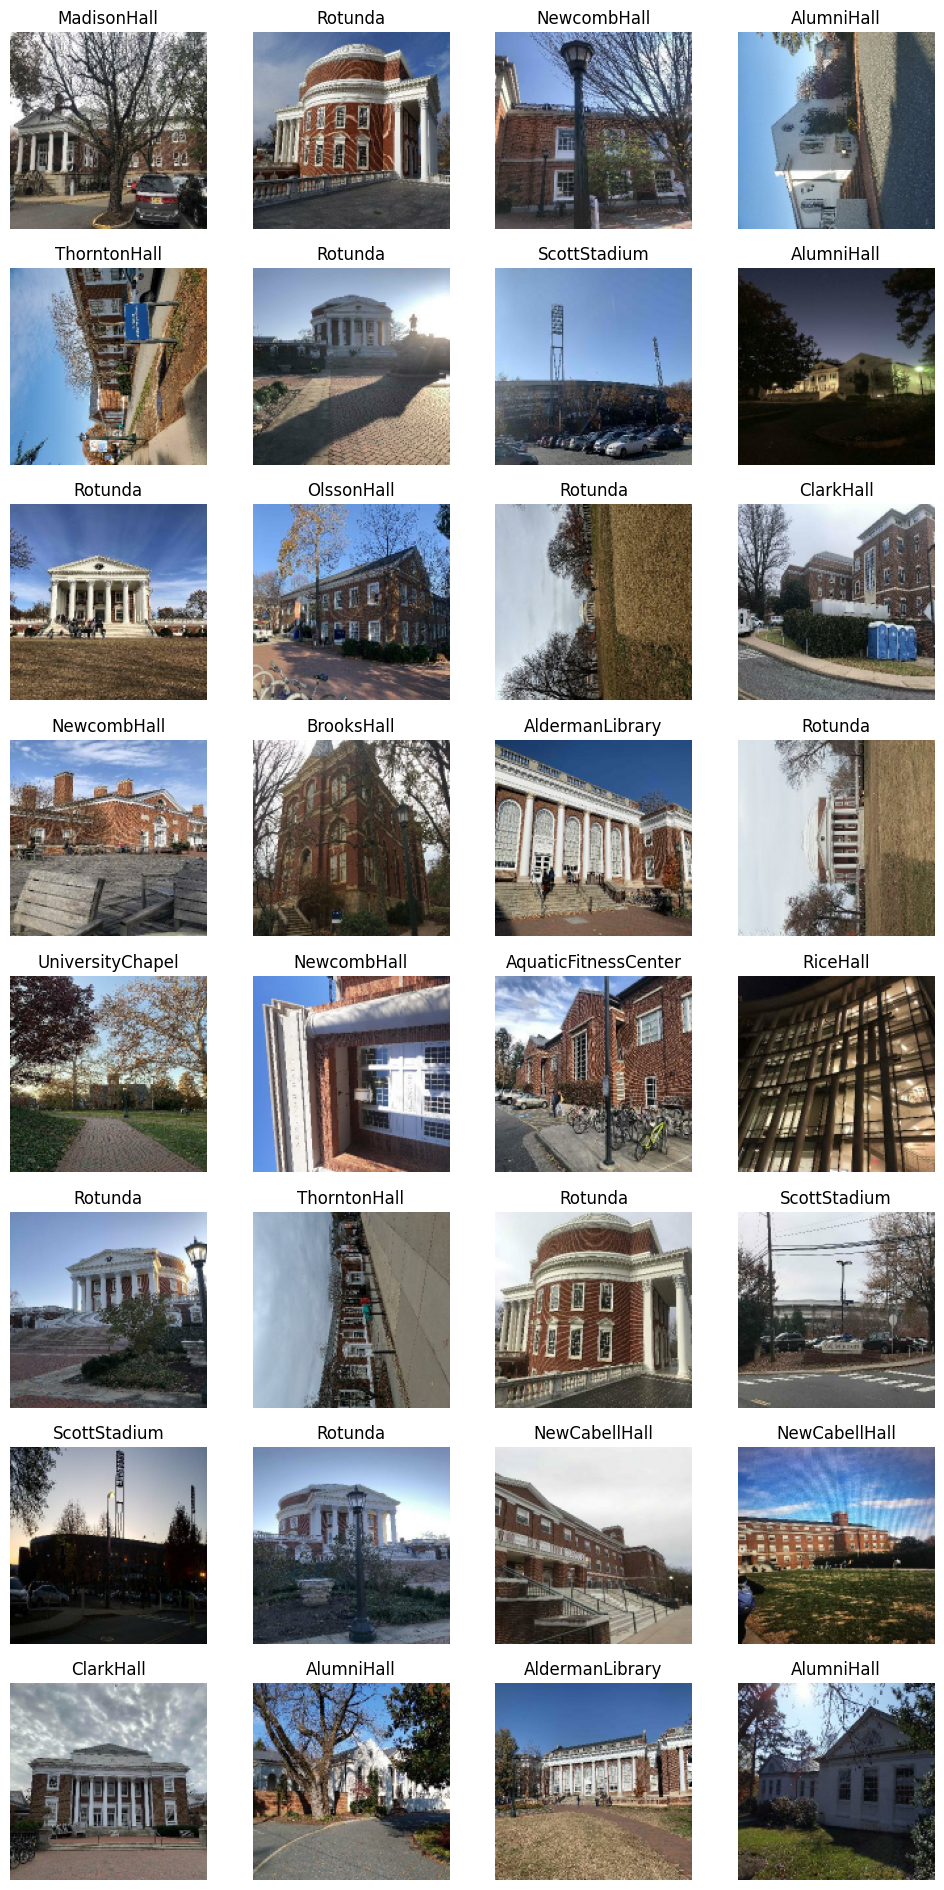

In [ ]:
class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter',
  'BavaroHall', 'BrooksHall', 'ClarkHall', 'MadisonHall', 'MinorHall', 'NewCabellHall',
  'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall', 'Rotunda', 'ScottStadium',
  'ThorntonHall', 'UniversityChapel']

n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training model...
Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.4332 - loss: 2.0162 - val_accuracy: 0.7172 - val_loss: 1.0059 - learning_rate: 0.0010
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.6906 - loss: 1.0572 - val_accuracy: 0.7595 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.7576 - loss: 0.8228 - val_accuracy: 0.7802 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7940 - loss: 0.6926 - val_accuracy: 0.8103 - val_loss: 0.6951 - learning_rate: 0.0010
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8254 - loss: 0.5766 - val_accuracy: 0.8187 - val_loss: 0.6758 - learning_rate: 0.0010
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8437 - loss: 0.5279 - val_accuracy: 0.8145 - val_loss: 0.6816 - learning_rate: 0.0010
Epoch 7

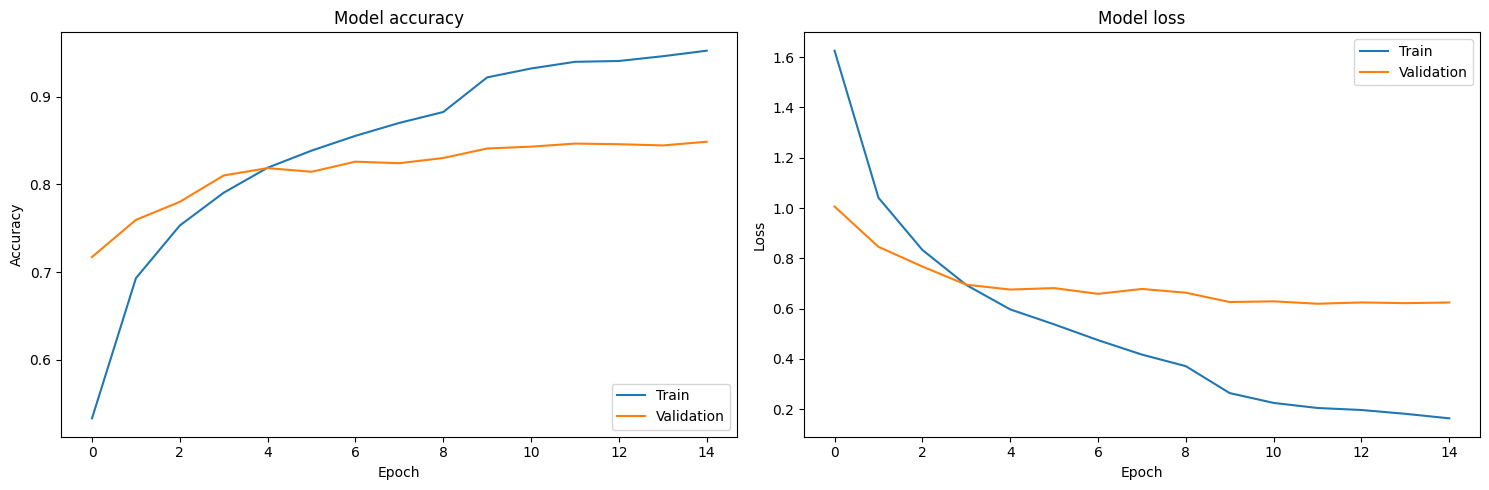


Evaluating final model...
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8438 - loss: 0.6203

Validation Loss: 0.6194
Validation Accuracy: 0.8467


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = ResNet50V2(weights='imagenet',
                       include_top=False,
                       input_shape=(img_height, img_width, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)

print("Training model...")
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=15,
    callbacks=[early_stopping, reduce_lr]
)

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'], loc='lower right')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

print("\nEvaluating final model...")
evaluation = model.evaluate(validation_ds)
print(f"\nValidation Loss: {evaluation[0]:.4f}")
print(f"Validation Accuracy: {evaluation[1]:.4f}")

def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

myModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(18, activation='softmax')
])

myModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,661,106 (82.63 MB)

 Trainable params: 21,659,122 (82.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
myEpochs = 15
myOptimizer = Adam(learning_rate=0.001)
myLoss = 'sparse_categorical_crossentropy'
myMetrics = ['accuracy']

myModel.compile(
    loss=myLoss,
    optimizer=myOptimizer,
    metrics=myMetrics
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.00001
)
history = myModel.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=myEpochs,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - accuracy: 0.1718 - loss: 3.2770 - val_accuracy: 0.1624 - val_loss: 3.6016 - learning_rate: 0.0010
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.3701 - loss: 2.1293 - val_accuracy: 0.4900 - val_loss: 1.6695 - learning_rate: 0.0010
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.4896 - loss: 1.7127 - val_accuracy: 0.4897 - val_loss: 1.7313 - learning_rate: 0.0010
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.5921 - loss: 1.3551 - val_accuracy: 0.5688 - val_loss: 1.4842 - learning_rate: 0.0010
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.6662 - loss: 1.1488 - val_accuracy: 0.5929 - val_loss: 1.4727 - learning_rate: 0.0010
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.7029 - loss: 0.9850 - val_accuracy: 0.5705 - val_loss: 1.5046 - learning_rate: 0.0010
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.7497 - 

Next, you need to create (1) a plot of training and validation `loss` and (2) a plot of training and validation `accuracy`. These plots might give you some insights about your model performance and possibility of overfitting.

Report the performance of your architecture on the validation set in a `confusion matrix`. Make comments on the performance by answering the following questiosns:
- How well do you think your architecture is doing (overall accuracy)?
- Where did it makes mistake most?
- Which classes can be improved?

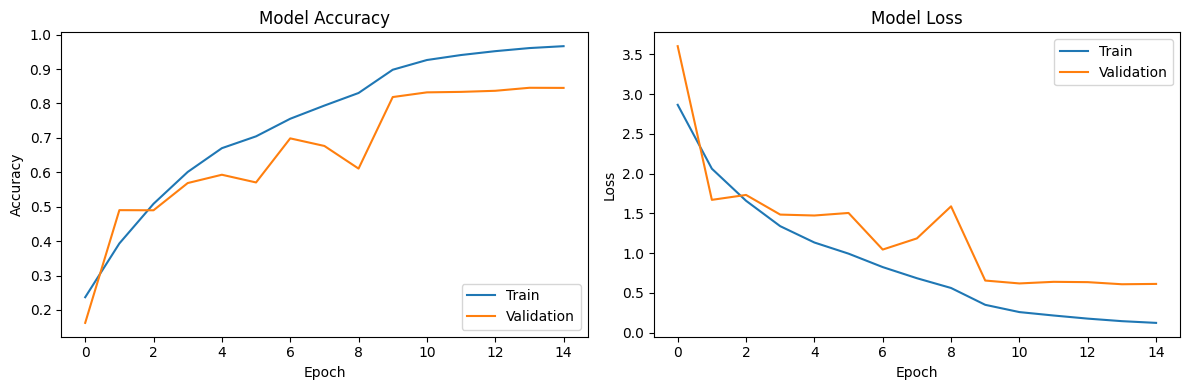

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

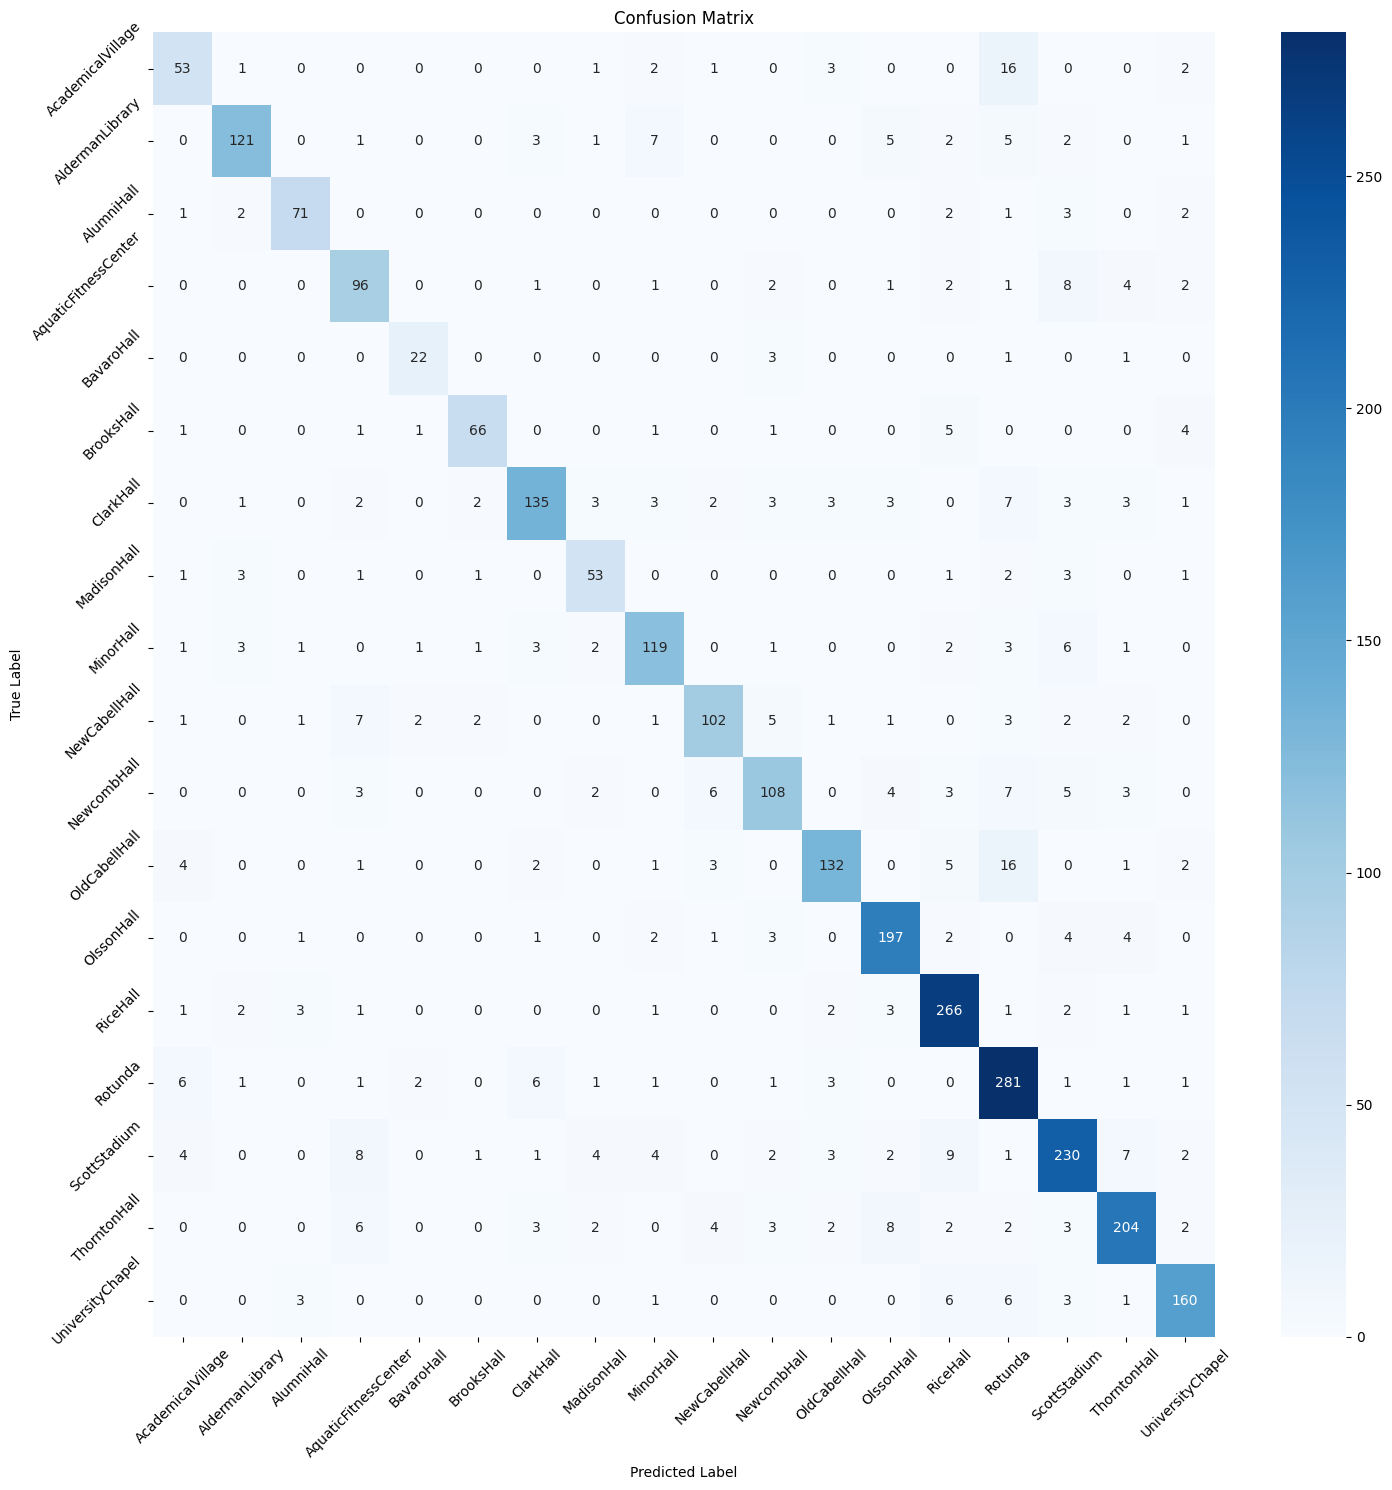


Classification Report:
                      precision    recall  f1-score   support

   AcademicalVillage       0.73      0.67      0.70        79
     AldermanLibrary       0.90      0.82      0.86       148
          AlumniHall       0.89      0.87      0.88        82
AquaticFitnessCenter       0.75      0.81      0.78       118
          BavaroHall       0.79      0.81      0.80        27
          BrooksHall       0.90      0.82      0.86        80
           ClarkHall       0.87      0.79      0.83       171
         MadisonHall       0.77      0.80      0.79        66
           MinorHall       0.83      0.83      0.83       144
       NewCabellHall       0.86      0.78      0.82       130
         NewcombHall       0.82      0.77      0.79       141
       OldCabellHall       0.89      0.79      0.84       167
          OlssonHall       0.88      0.92      0.90       215
            RiceHall       0.87      0.94      0.90       284
             Rotunda       0.80      0.92    

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

predictions = []
true_labels = []

for images, labels in validation_ds:
    pred = myModel.predict(images)
    pred_classes = np.argmax(pred, axis=1)
    predictions.extend(pred_classes)
    true_labels.extend(labels.numpy())

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=32
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=32
)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(18, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

Found 14286 files belonging to 18 classes.
Using 11429 files for training.
Found 14286 files belonging to 18 classes.
Using 2857 files for validation.


In [ ]:
# Phase 1:
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

print("Training Phase 1 - Top layers only...")
history_phase1 = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Training Phase 1 - Top layers only...
Epoch 1/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 248ms/step - accuracy: 0.6087 - loss: 1.4856 - val_accuracy: 0.8337 - val_loss: 0.6262 - learning_rate: 0.0010
Epoch 2/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.8371 - loss: 0.5644 - val_accuracy: 0.8477 - val_loss: 0.5645 - learning_rate: 0.0010
Epoch 3/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8780 - loss: 0.4139 - val_accuracy: 0.8859 - val_loss: 0.4493 - learning_rate: 0.0010
Epoch 4/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.9016 - loss: 0.3333 - val_accuracy: 0.8936 - val_loss: 0.4095 - learning_rate: 0.0010
Epoch 5/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.9217 - loss: 0.2684 - val_accuracy: 0.8953 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 6/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.9247 - loss: 0.2581 - val_accuracy: 0.8918 - val_loss: 0.4478 - learning_rate: 0.0010
Epoch 7/20
358/358 ━━━━━━━━━━━━

In [ ]:
# Phase 2:
for layer in base_model.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining Phase 2 - Full model fine-tuning...")
history_phase2 = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)


Training Phase 2 - Full model fine-tuning...
Epoch 1/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 828s 1s/step - accuracy: 0.7545 - loss: 1.1551 - val_accuracy: 0.8960 - val_loss: 0.5663 - learning_rate: 1.0000e-05
Epoch 2/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 174s 485ms/step - accuracy: 0.9419 - loss: 0.1959 - val_accuracy: 0.9104 - val_loss: 0.4732 - learning_rate: 1.0000e-05
Epoch 3/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 172s 482ms/step - accuracy: 0.9736 - loss: 0.0758 - val_accuracy: 0.9153 - val_loss: 0.4459 - learning_rate: 1.0000e-05
Epoch 4/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 173s 482ms/step - accuracy: 0.9896 - loss: 0.0367 - val_accuracy: 0.9233 - val_loss: 0.4241 - learning_rate: 1.0000e-05
Epoch 5/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 173s 482ms/step - accuracy: 0.9944 - loss: 0.0235 - val_accuracy: 0.9275 - val_loss: 0.4025 - learning_rate: 1.0000e-05
Epoch 6/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 172s 481ms/step - accuracy: 0.9961 - loss: 0.0166 - val_accuracy: 0.9258 - val_loss: 0.4075 - learning_rate: 1.0000e-


Generating evaluation metrics...
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━

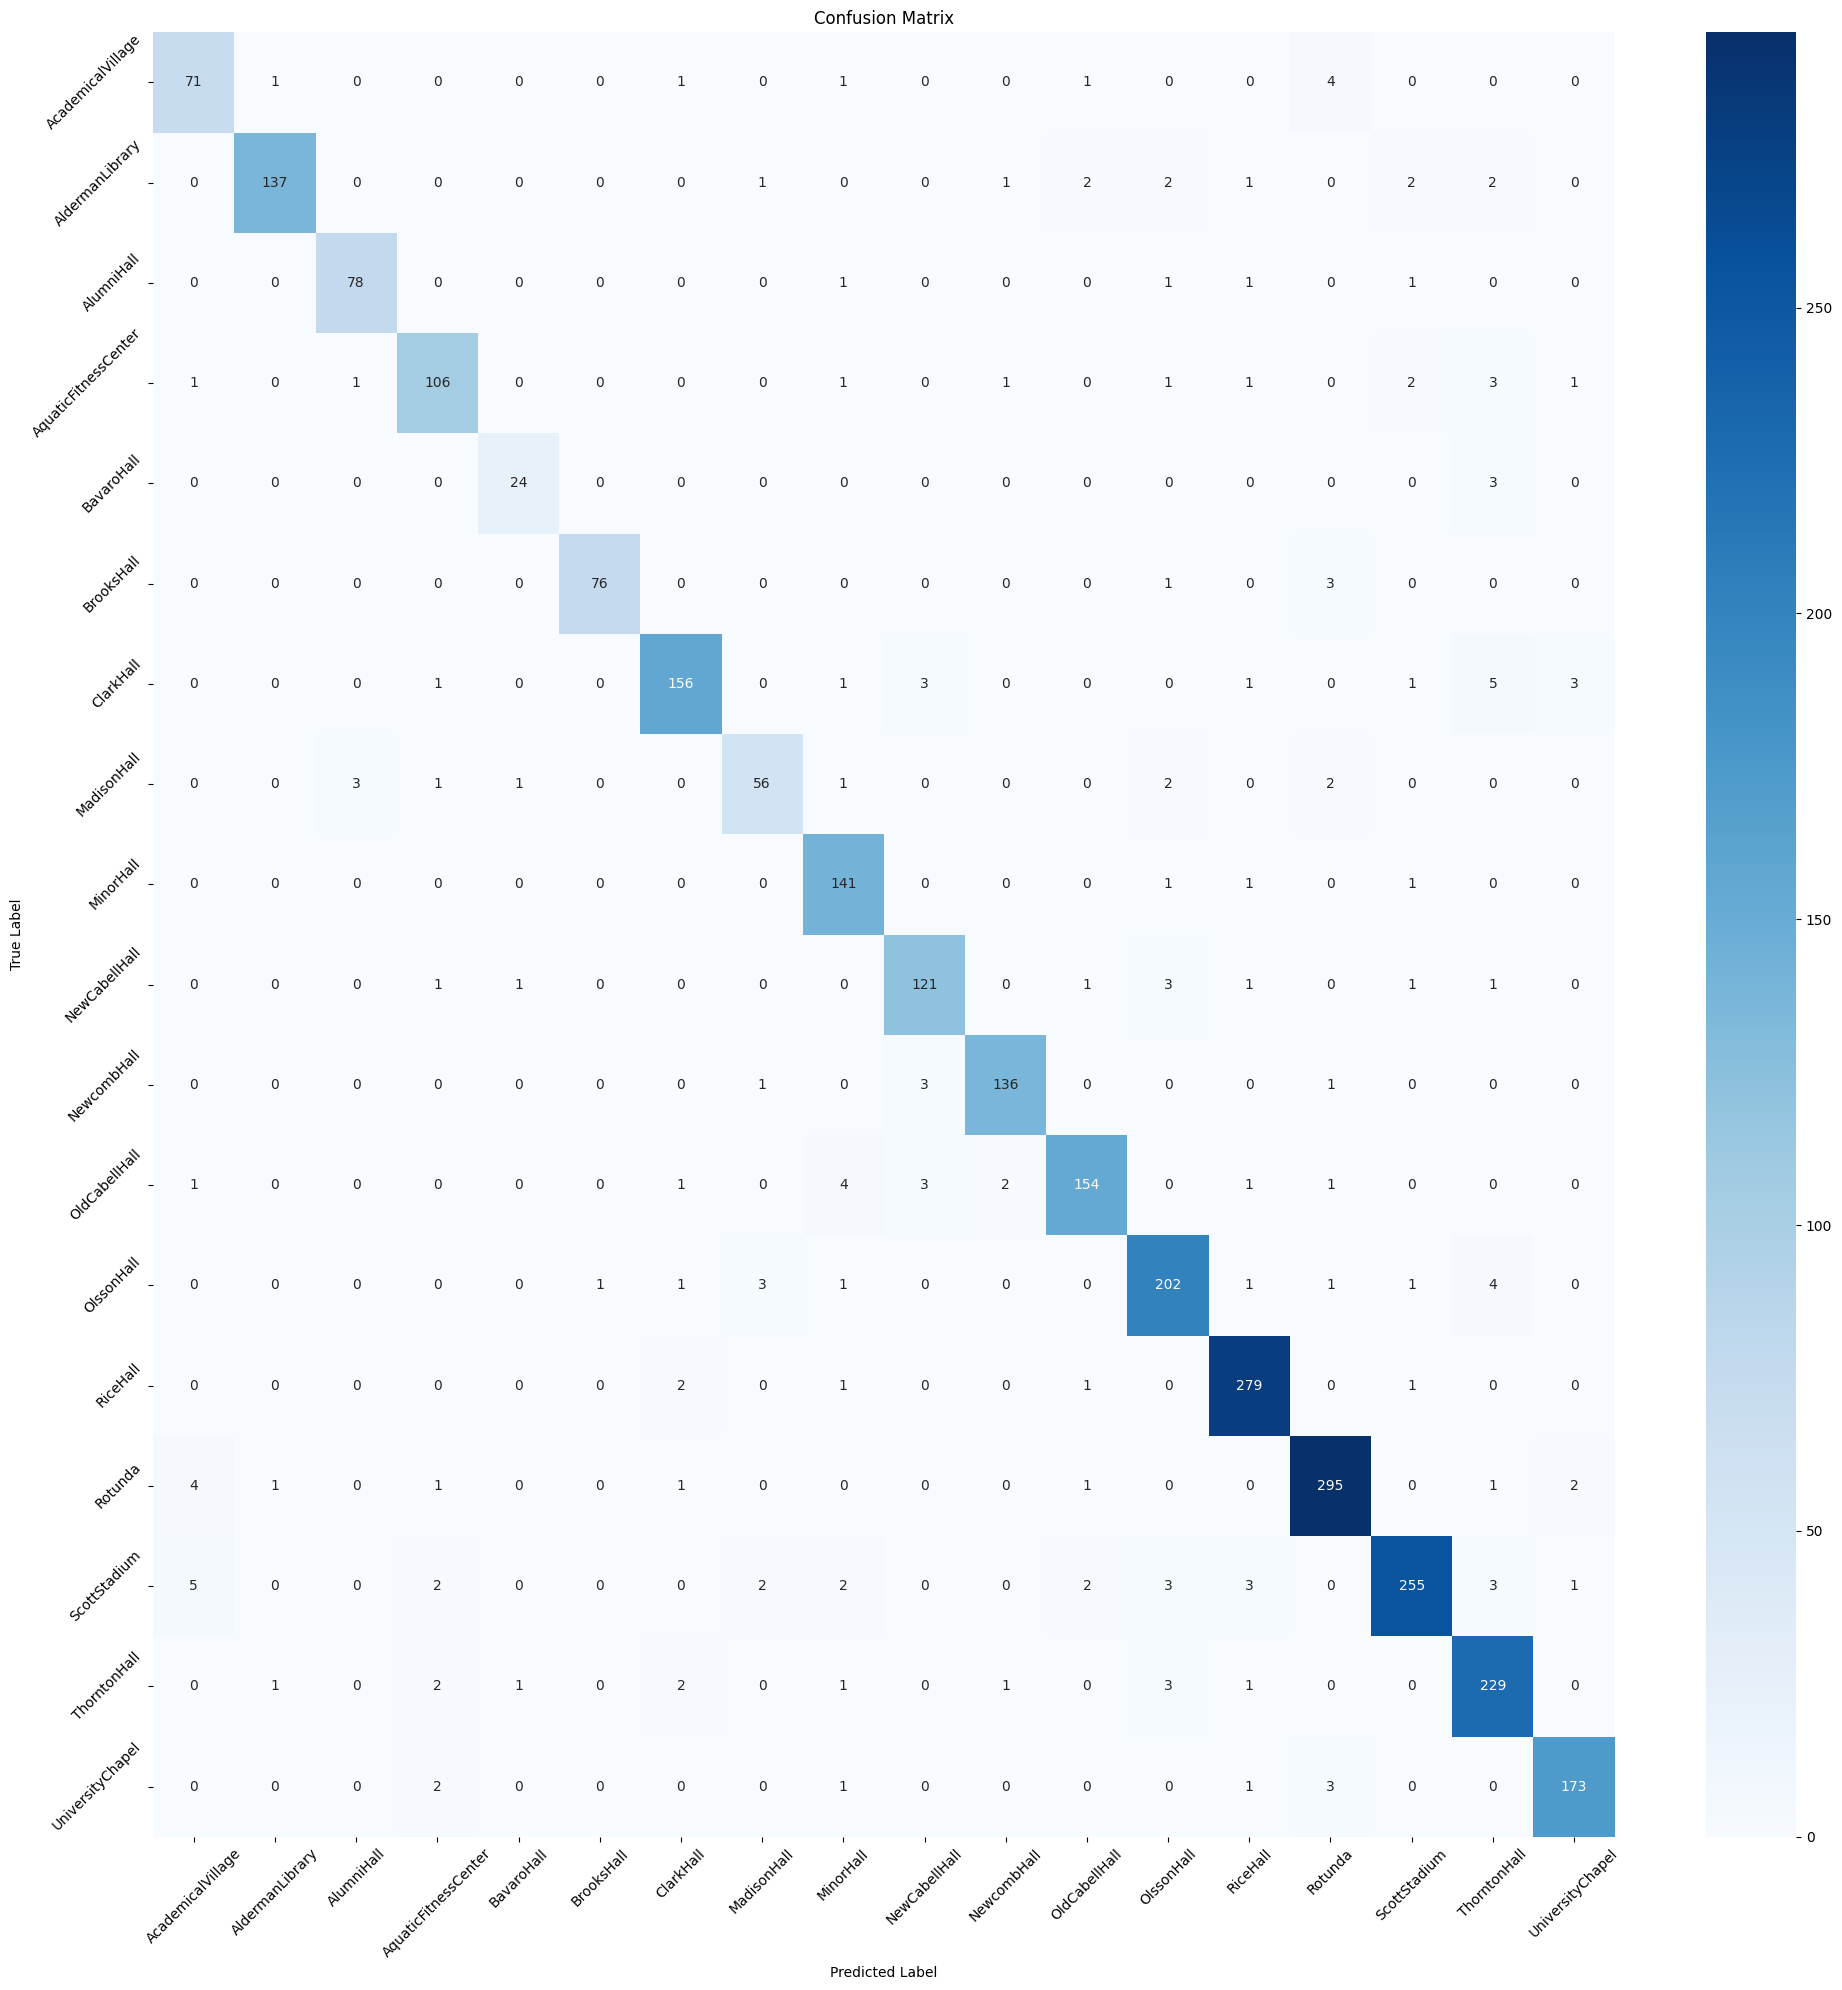


Classification Report:
                      precision    recall  f1-score   support

   AcademicalVillage       0.87      0.90      0.88        79
     AldermanLibrary       0.98      0.93      0.95       148
          AlumniHall       0.95      0.95      0.95        82
AquaticFitnessCenter       0.91      0.90      0.91       118
          BavaroHall       0.89      0.89      0.89        27
          BrooksHall       0.99      0.95      0.97        80
           ClarkHall       0.95      0.91      0.93       171
         MadisonHall       0.89      0.85      0.87        66
           MinorHall       0.90      0.98      0.94       144
       NewCabellHall       0.93      0.93      0.93       130
         NewcombHall       0.96      0.96      0.96       141
       OldCabellHall       0.95      0.92      0.94       167
          OlssonHall       0.92      0.94      0.93       215
            RiceHall       0.96      0.98      0.97       284
             Rotunda       0.95      0.96    

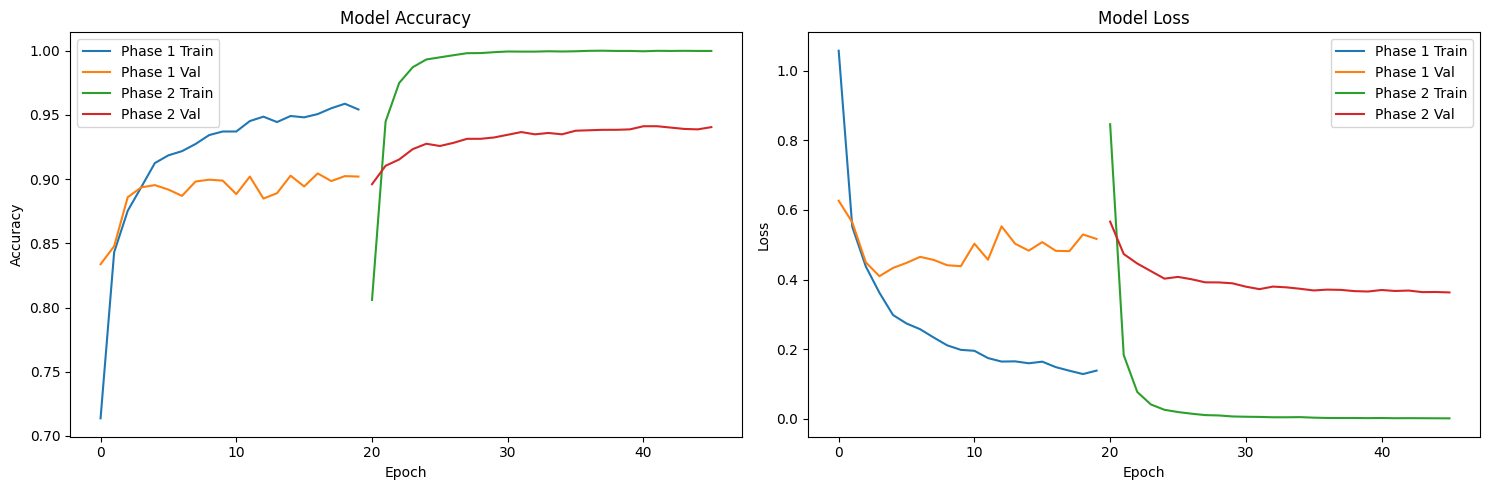


Model saved as 'uva_landmark_classifier_v2.h5'


In [ ]:
def plot_training_history(history1, history2):
    total_epochs = len(history1.history['accuracy']) + len(history2.history['accuracy'])
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(len(history1.history['accuracy'])),
             history1.history['accuracy'], label='Phase 1 Train')
    plt.plot(range(len(history1.history['accuracy'])),
             history1.history['val_accuracy'], label='Phase 1 Val')
    plt.plot(range(len(history1.history['accuracy']), total_epochs),
             history2.history['accuracy'], label='Phase 2 Train')
    plt.plot(range(len(history1.history['accuracy']), total_epochs),
             history2.history['val_accuracy'], label='Phase 2 Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(history1.history['loss'])),
             history1.history['loss'], label='Phase 1 Train')
    plt.plot(range(len(history1.history['loss'])),
             history1.history['val_loss'], label='Phase 1 Val')
    plt.plot(range(len(history1.history['loss']), total_epochs),
             history2.history['loss'], label='Phase 2 Train')
    plt.plot(range(len(history1.history['loss']), total_epochs),
             history2.history['val_loss'], label='Phase 2 Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

print("\nGenerating evaluation metrics...")
predictions = []
true_labels = []

for images, labels in validation_ds:
    pred = model.predict(images)
    pred_classes = np.argmax(pred, axis=1)
    predictions.extend(pred_classes)
    true_labels.extend(labels.numpy())

plt.figure(figsize=(20, 20))
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

plot_training_history(history_phase1, history_phase2)

model.save('uva_landmark_classifier_v2.h5')
print("\nModel saved as 'uva_landmark_classifier_v2.h5'")